In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 

In [3]:
plt.rcParams['font.family'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [58]:
s2020 = pd.read_csv('../data/2020/survey_results_public.csv')
pd.set_option('display.max_columns', None)
s2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [87]:
data = s2020[['DevType', 'Gender', 'EdLevel', 'Age', 'YearsCode']]
data = data.dropna()
front_end = []
back_end = []

for id, row in data.iterrows():
    if 'Developer, front-end' in row['DevType'] and 'Developer, back-end' not in row['DevType']:
        front_end.append(int(id))
    elif 'Developer, front-end' not in row['DevType'] and 'Developer, back-end' in row['DevType']:
        back_end.append(int(id))

frontend_developers = data.loc[front_end, :]
backend_developers = data.loc[back_end, :]
frontend_developers.head()

,DevType,Gender,EdLevel,Age,YearsCode
11,"Designer;Developer, front-end",Man,Some college/university study without earning ...,49.0,7
13,"Developer, desktop or enterprise applications;...",Man,"Associate degree (A.A., A.S., etc.)",27.0,5
32,"Developer, front-end;Developer, full-stack;Dev...",Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",39.0,20
34,"Designer;Developer, front-end",Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16.0,3
36,"Developer, front-end",Man,"Associate degree (A.A., A.S., etc.)",19.0,2


d:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


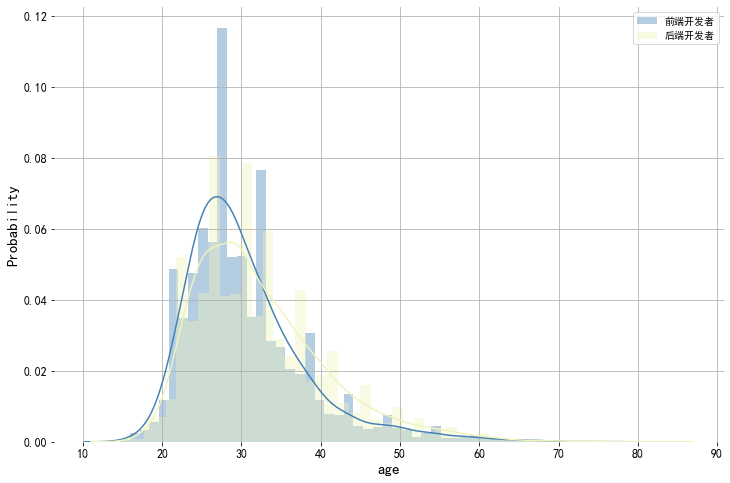

In [61]:
import seaborn as sns 
plt.figure(figsize=(12, 8))  #设置画布的大小
sns.set_palette("hls")       #设置所有图的颜色，使用hls色彩空间
sns.distplot(frontend_developers['Age'],color="steelblue",bins=50, label='前端开发者')
plt.xlabel('age',fontsize=15)           #添加x轴标签，并改变字体
plt.ylabel('Probability',fontsize=15)   #添加y轴变浅，并改变字体
plt.grid(linestyle='-')   #添加网格线
plt.xticks(fontsize=12)   #改变x轴字体大小
plt.yticks(fontsize=12)   #改变y轴字体大小
sns.despine(ax=None, top=True, right=True, left=True,bottom=True)    #将图像的框框删掉


sns.distplot(backend_developers['Age'],color="#f0f3bd",bins=50, label='后端开发者')
plt.xlabel('age',fontsize=15)           #添加x轴标签，并改变字体
plt.ylabel('Probability',fontsize=15)   #添加y轴变浅，并改变字体
plt.grid(linestyle='-')   #添加网格线
plt.xticks(fontsize=12)   #改变x轴字体大小
plt.yticks(fontsize=12)   #改变y轴字体大小
sns.despine(ax=None, top=True, right=True, left=True,bottom=True)    #将图像的框框删掉

plt.legend()
plt.show()

d:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


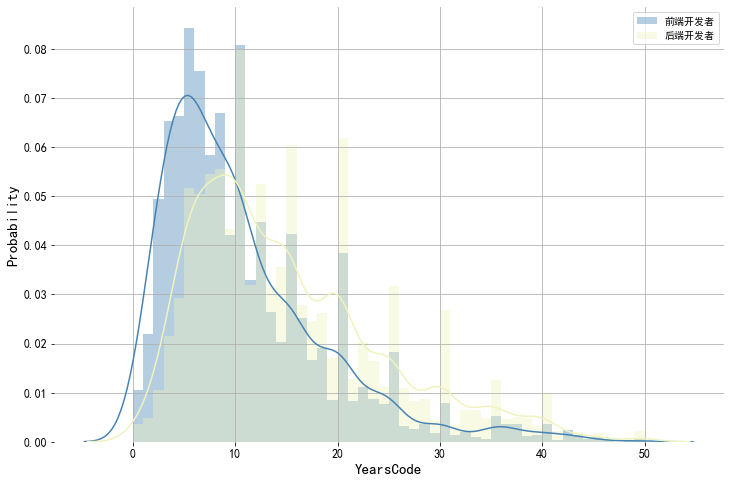

In [69]:
import seaborn as sns 
plt.figure(figsize=(12, 8))  #设置画布的大小
sns.set_palette("hls")       #设置所有图的颜色，使用hls色彩空间
sns.distplot(frontend_developers['YearsCode'].apply(lambda x: 0 if 'Less' in x else 50 if 'More' in x else x),color="steelblue",bins=50, label='前端开发者')
plt.xlabel('YearsCode',fontsize=15)           #添加x轴标签，并改变字体
plt.ylabel('Probability',fontsize=15)   #添加y轴变浅，并改变字体
plt.grid(linestyle='-')   #添加网格线
plt.xticks(fontsize=12)   #改变x轴字体大小
plt.yticks(fontsize=12)   #改变y轴字体大小
sns.despine(ax=None, top=True, right=True, left=True,bottom=True)    #将图像的框框删掉


sns.distplot(backend_developers['YearsCode'].apply(lambda x: 0 if 'Less' in x else 50 if 'More' in x else x),color="#f0f3bd",bins=50, label='后端开发者')
plt.xlabel('YearsCode',fontsize=15)           #添加x轴标签，并改变字体
plt.ylabel('Probability',fontsize=15)   #添加y轴变浅，并改变字体
plt.grid(linestyle='-')   #添加网格线
plt.xticks(fontsize=12)   #改变x轴字体大小
plt.yticks(fontsize=12)   #改变y轴字体大小
sns.despine(ax=None, top=True, right=True, left=True,bottom=True)    #将图像的框框删掉

plt.legend()
plt.show()

In [75]:
gender_stat_frontend = frontend_developers['Gender'].value_counts()[:2]
gender_stat_backend = backend_developers['Gender'].value_counts()[:2]

gender_stat_backend

Man      9382
Woman     602
Name: Gender, dtype: int64

In [90]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=gender_stat_frontend.index, values=gender_stat_frontend, name='frontend'), row=1, col=1)

fig.add_trace(go.Pie(labels=gender_stat_backend.index, values=gender_stat_backend, name='backend'), row=1, col=2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Stack Overflow Survey Gender Stats",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='frontend', x=0.13, y=0.5, font_size=20, showarrow=False),
                 dict(text='backend', x=0.87, y=0.5, font_size=20, showarrow=False)])
fig.show()


In [102]:
rename_dict = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor', 
'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master',
'Some college/university study without earning a degree':'Noncompletion',
'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary',
'Associate degree (A.A., A.S., etc.)':'Associate',
'Other doctoral degree (Ph.D., Ed.D., etc.)':'Doctoral',
'Professional degree (JD, MD, etc.)':'Professional',
'Primary/elementary school':'Primary',
'I never completed any formal education':'None'}

edu_stat_frontend = frontend_developers['EdLevel'].value_counts().rename(rename_dict)
edu_stat_backend = backend_developers['EdLevel'].value_counts().rename(rename_dict)

edu_stat_backend

Bachelor         5265
Master           3032
Noncompletion    1221
Secondary         415
Associate         308
Doctoral          307
Professional      138
Primary            46
None               34
Name: EdLevel, dtype: int64

In [105]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=edu_stat_frontend.index, values=edu_stat_frontend, name='frontend'), row=1, col=1)

fig.add_trace(go.Pie(labels=edu_stat_backend.index, values=edu_stat_backend, name='backend'), row=1, col=2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Stack Overflow Survey Edu Stats",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='frontend', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='backend', x=0.86, y=0.5, font_size=20, showarrow=False)])
fig.show()
